In [1]:
import numpy as np
from matplotlib import pyplot as plt
def generate_triangular_lattice(H=500, W=500, spacing=30, sigma=2.5, amplitude=1.0, center=None):
    """
    Generate a triangular lattice pattern as a 2D numpy array.

    Parameters
    ----------
    H, W : int
        Height and width of the output array.
    spacing : float
        Distance between nearest lattice points (in pixels).
    sigma : float
        Gaussian peak width (standard deviation in pixels).
    amplitude : float
        Peak height.
    center : tuple(float, float) or None
        Center of the lattice in (x, y) pixel coordinates.
        Can be fractional (subpixel precision). If None, defaults to image center.

    Returns
    -------
    data : np.ndarray
        2D numpy array of shape (H, W) with normalized values in range [0, 1].
    """
    # Lattice basis vectors (triangular symmetry)
    a1 = np.array([1.0, 0.0])
    a2 = np.array([0.5, np.sqrt(3) / 2])

    # Coordinate grid
    y = np.arange(H)
    x = np.arange(W)
    X, Y = np.meshgrid(x, y)

    # Set center
    if center is None:
        center = (W / 2, H / 2)
    center = np.array(center, dtype=float)  # allow subpixel

    # Output array
    data = np.zeros((H, W), dtype=float)

    # Number of lattice points in each direction
    n_i = int(W / spacing) + 6
    n_j = int(H / spacing) + 6

    # Generate Gaussian peaks
    for i in range(-n_i, n_i + 1):
        for j in range(-n_j, n_j + 1):
            pos = (i * a1 + j * a2) * spacing + center
            px, py = pos
            # Skip points too far outside image
            if px < -3*sigma or px > W + 3*sigma or py < -3*sigma or py > H + 3*sigma:
                continue
            rr = (X - px) ** 2 + (Y - py) ** 2
            data += amplitude * np.exp(-rr / (2 * sigma ** 2))

    # Normalize to 0..1
    data = (data - data.min()) / (data.max() - data.min())

    return data

In [2]:
data = generate_triangular_lattice(H=500, W=500, spacing=10, sigma=9, amplitude=1.0, center=(0,0))

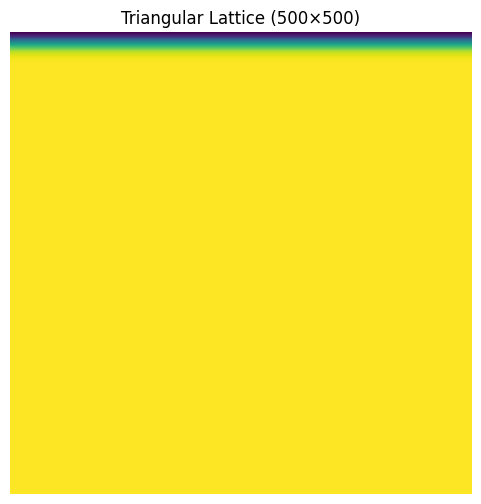

In [3]:
plt.figure(figsize=(6, 6))
plt.imshow(data, origin='lower', cmap='viridis', interpolation='nearest')
plt.title("Triangular Lattice (500×500)")
plt.axis('off')
plt.show()

In [4]:
data.max()

np.float64(1.0)

In [5]:
H=500 
W=500
spacing=30
sigma=9
 
I_atom = generate_triangular_lattice(H=500, W=500, spacing=30, sigma=sigma, amplitude=1.0, center=(0,0))
I_CDW = generate_triangular_lattice(H=500, W=500, spacing=90, sigma=sigma*3, amplitude=1.0, center=(30+15,15/np.sqrt(3)))
I_CDW2 = generate_triangular_lattice(H=500, W=500, spacing=90, sigma=sigma, amplitude=1.0, center=(30+15,105/np.sqrt(3)))
# I_CDW = generate_triangular_lattice(H=500, W=500, spacing=90, sigma=sigma*3, amplitude=1.0, center=(0,0))

I_comb = -I_atom + I_CDW*3 + I_CDW2*1.5

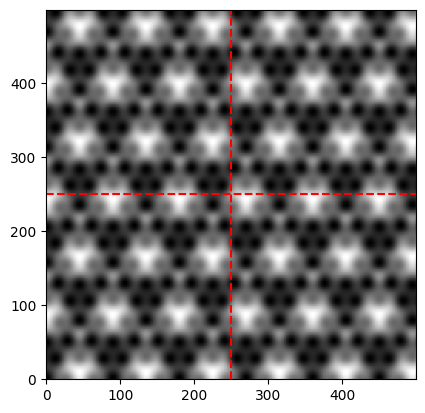

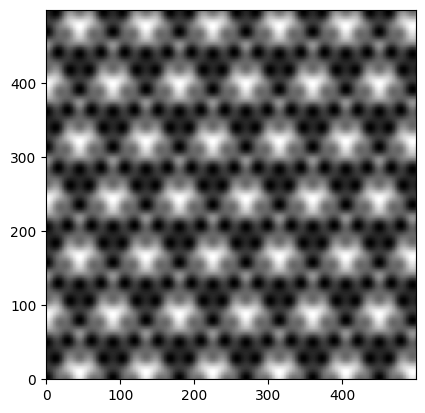

In [6]:
plt.imshow(I_comb, origin='lower', cmap='gray', interpolation='nearest')
ax = plt.gca()
ax.set_aspect('equal')
ax.axvline(250, color='red', linestyle='--')
ax.axhline(250, color='red', linestyle='--')

plt.show()
plt.imshow(I_comb, origin='lower', cmap='gray', interpolation='nearest')

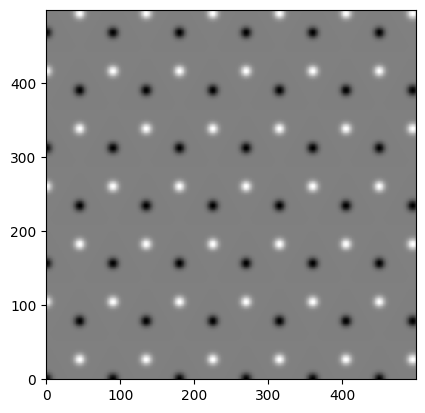

In [7]:
sig =5
I_CDW_yin = generate_triangular_lattice(H=500, W=500, spacing=90, sigma=sig, center=(0,0))
I_CDW_yang = generate_triangular_lattice(H=500, W=500, spacing=90, sigma=sig,  center=(45,15*np.sqrt(3)))
I_CDW = I_CDW_yang - I_CDW_yin
plt.imshow(I_CDW, origin='lower', cmap='gray', interpolation='nearest')

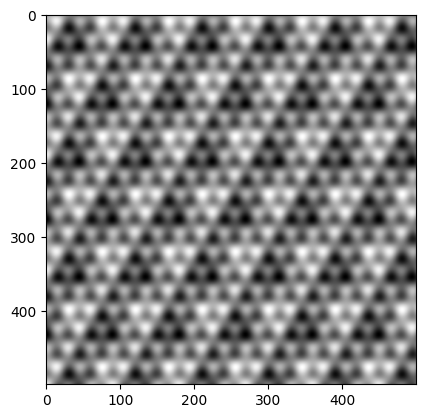

In [30]:
import numpy as np

def get_angle_vector(angle_deg):
    theta = np.radians(angle_deg)
    return np.array([np.cos(theta), np.sin(theta)])
cs = get_angle_vector

cs(60)
r3 = np.sqrt(3)
H=500 
W=500
spacing=30
sigma=15
posYinYangs = np.array(((0,0),
                        r3*30*cs(30)))
shifts = 15*r3*np.array((
    cs(210),
    cs(330),
    cs(90)
))*0.8



img = np.zeros((H,W))
img += generate_triangular_lattice(H=H, W=W, spacing=spacing, sigma=sigma, center= (spacing/r3)*cs(30))
img -= generate_triangular_lattice(H=H, W=W, spacing=spacing, sigma=sigma, center= (spacing/r3)*cs(-30))
for i4 in range(2):
    for iyy in range(2):
        posYinYang = posYinYangs[iyy] 
        for ishift in range(3):
            shift = shifts[ishift]
            center = posYinYang + shift * (-2*iyy+1) + 30*cs(120)*i4 
            
            #+(spacing/r3)*cs(-30)
            corrugation_now = generate_triangular_lattice(H=H, W=W, spacing=spacing*3, sigma=sigma,  center=center)*.5
            img += corrugation_now* (-2*iyy+1)
# from scipy.ndimage import gaussian_filter
# img = gaussian_filter(img, sigma=4)
        
plt.imshow(img,cmap='gray',vmax=img.max(),vmin=img.min())